In [1]:
#https://towardsdatascience.com/the-real-world-as-seen-on-twitter-sentiment-analysis-part-one-5ac2d06b63fb


# Naive Bayes Classifier 
Used to learn the correct labels from this training set and do a binary classification. Naive Bayes theorem calculates the probability of a certain event happening based on the joint probabilistic distributions of certain other events. 

## Explore Labeled Training Dataset

In [4]:
import pandas as pd
from scipy.sparse import *
import numpy as np
import csv
import string
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
import pickle
import random
import re
from string import punctuation

import nltk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud

In [5]:
#Read Data neg and pos with corresponding label

raw_data_neg = pd.read_csv('./twitter-datasets/train_neg.txt', header=None, sep="\n", encoding='latin1', quoting=csv.QUOTE_NONE, names=['text'],
                               error_bad_lines=False, warn_bad_lines=False).drop_duplicates()
raw_data_neg['text'] = raw_data_neg['text']
raw_data_neg['label'] = 0
raw_data_neg = raw_data_neg[:5000]

raw_data_pos = pd.read_csv('./twitter-datasets/train_pos.txt', header=None, sep="\n", encoding='latin1', quoting=csv.QUOTE_NONE, names=['text'],
                               error_bad_lines=False, warn_bad_lines=False).drop_duplicates()
raw_data_pos['label'] = 1
raw_data_pos['text'] = raw_data_pos['text']
raw_data_pos = raw_data_pos[:5000]
    
raw_data = pd.concat([raw_data_neg, raw_data_pos], ignore_index=True)

raw_data

,text,label
0,vinco tresorpack 6 ( difficulty 10 of 10 objec...,0
1,glad i dot have taks tomorrow ! ! #thankful #s...,0
2,1-3 vs celtics in the regular season = were fu...,0
3,<user> i could actually kill that girl i'm so ...,0
4,<user> <user> <user> i find that very hard to ...,0
5,wish i could be out all night tonight ! <user>,0
6,<user> i got kicked out the wgm,0
7,rt <user> <user> <user> yes she is ! u tell it...,0
8,why is she so perfect <url>,0
9,<user> hi harry ! did u havea good time in aus...,0


###  Number of words contained in every sentence

In [6]:
def word_count(tweet):
    return len(tweet.split())
    
raw_data['#word'] = raw_data['text'].apply(word_count)
raw_data

,text,label,#word
0,vinco tresorpack 6 ( difficulty 10 of 10 objec...,0,21
1,glad i dot have taks tomorrow ! ! #thankful #s...,0,10
2,1-3 vs celtics in the regular season = were fu...,0,17
3,<user> i could actually kill that girl i'm so ...,0,13
4,<user> <user> <user> i find that very hard to ...,0,12
5,wish i could be out all night tonight ! <user>,0,10
6,<user> i got kicked out the wgm,0,7
7,rt <user> <user> <user> yes she is ! u tell it...,0,17
8,why is she so perfect <url>,0,6
9,<user> hi harry ! did u havea good time in aus...,0,33


14.336 16.8706
42 48


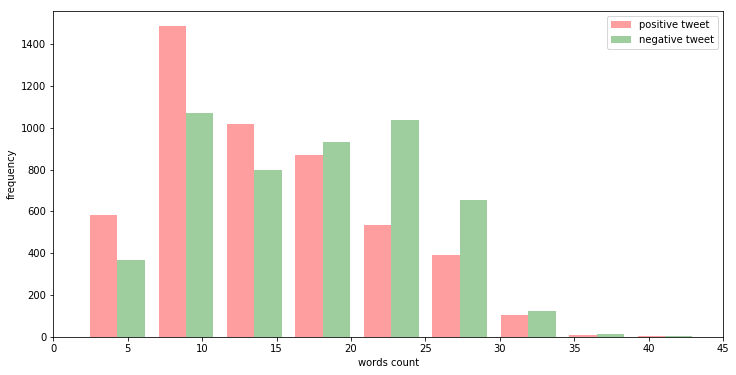

In [7]:
neg = raw_data['#word'][raw_data.label == 1]
pos = raw_data['#word'][raw_data.label == 0]

print(neg.mean(), pos.mean())
print(neg.max(), pos.max())

# plot word count distribution for both positive and negative sentiments
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('words count')
plt.ylabel('frequency')
g = plt.hist([neg, pos], color=['r','g'], alpha=0.38, label=['positive tweet','negative tweet'])
plt.legend(loc='upper right')


In [8]:
# Common words in training dataset
all_words = []
for line in list(raw_data['text']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
        
Counter(all_words).most_common(10)
# we have noticed that user is the word that is repeated more!

[('<user>', 6625),
 ('!', 4107),
 ('i', 4088),
 ('.', 2995),
 ('the', 2940),
 (',', 2880),
 ('to', 2818),
 ('you', 2397),
 ('(', 2163),
 ('a', 2051)]

### Zipf’s law

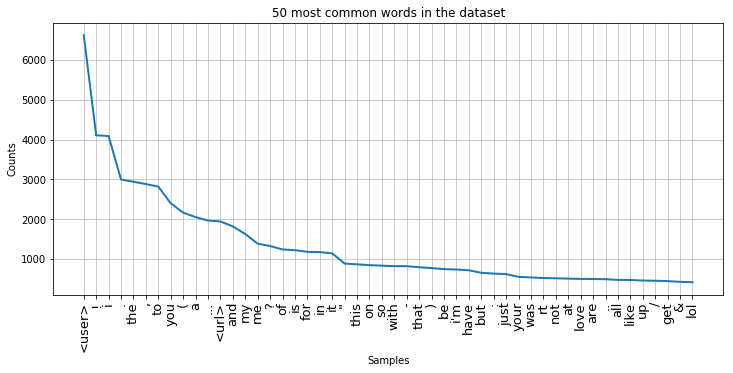

Text(0.5, 1.0, 'log-log plot of words frequency')

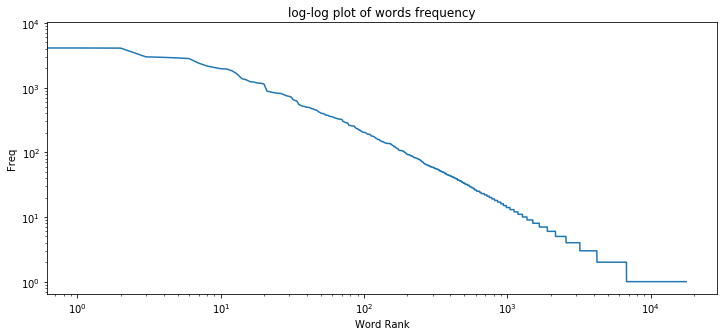

In [9]:
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.title('50 most common words in the dataset')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(50,cumulative=False)

# log-log plot
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')

 Clean tweets text by removing links, special characters

In [10]:
# helper function to clean tweets
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub('<url>','',tweet)
    #Convert <use> to AT_USER
    tweet = re.sub('<user>','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF') 
    return tweet
# ______________________________________________________________

before = raw_data['text'][100]

data = pd.DataFrame(data={'text': raw_data['text'].apply(processTweet)})
print(data)

after = processTweet(raw_data['text'][100])

print(before,'\n',after)

                                                   text
0     vinco tresorpack difficulty object disassemble...
1                          glad dot have taks tomorrow 
2     celtics the regular season were fucked play th...
3                  could actually kill that girl sorry 
4                    find that very hard believe afraid
5                     wish could out all night tonight 
6                                got kicked out the wgm
7                     yes she tell lips are closed okay
8                                      why she perfect 
9     harry did havea good time aus didnt get see ma...
10    introduction programming with 2nd edition this...
11                                               white 
12                       dan love and miss you don sad 
13          many wonderful building but still miss you 
14                 annoying because secretly find good 
15    the post boom spanish american fiction suny se...
16    layers the heart paperback this journey wa

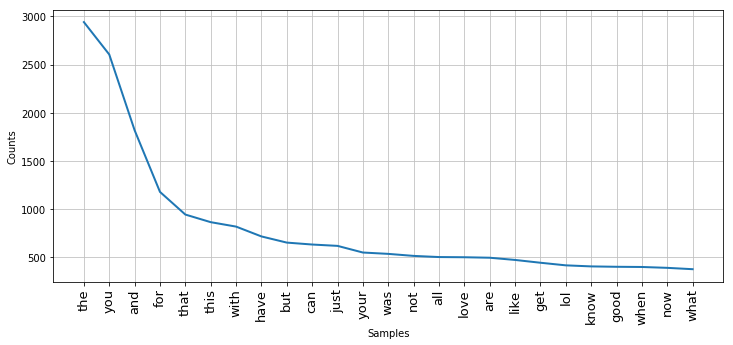

Text(0.5, 0, 'Word Rank')

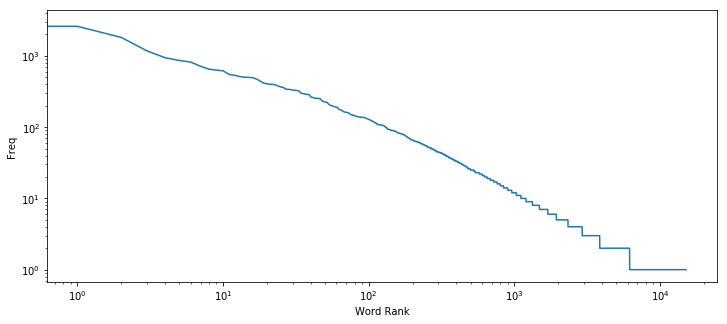

In [11]:
# most common words in twitter dataset
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())

# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

# log-log of all words 
word_counts = sorted(Counter(all_words).values(), reverse=True)

plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

### Tokenize without the Stop-Words

In [12]:
# tokenize helper function
def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]


# tokenize message column and create a column for tokens
data = data.copy()
data['tokens'] = data['text'].apply(text_process) # tokenize style 1
data

,text,tokens
0,vinco tresorpack difficulty object disassemble...,"[vinco, tresorpack, difficulty, object, disass..."
1,glad dot have taks tomorrow,"[glad, dot, taks, tomorrow]"
2,celtics the regular season were fucked play th...,"[celtics, regular, season, fucked, play, playo..."
3,could actually kill that girl sorry,"[could, actually, kill, girl, sorry]"
4,find that very hard believe afraid,"[find, hard, believe, afraid]"
5,wish could out all night tonight,"[wish, could, night, tonight]"
6,got kicked out the wgm,"[got, kicked, wgm]"
7,yes she tell lips are closed okay,"[yes, tell, lips, closed, okay]"
8,why she perfect,[perfect]
9,harry did havea good time aus didnt get see ma...,"[harry, havea, good, time, aus, didnt, get, se..."


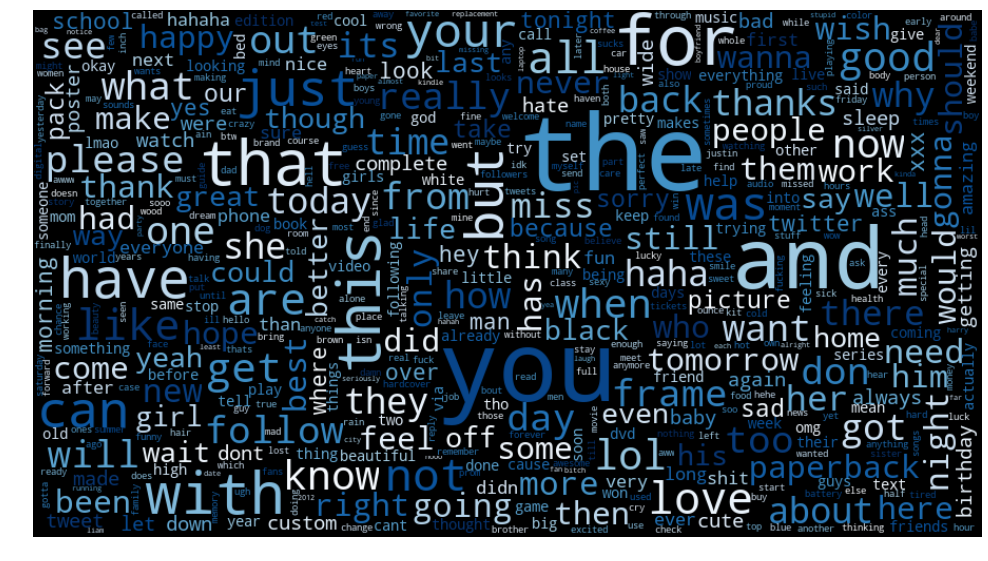

In [13]:
# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Vectorization — (Bag Of Words)
Convert each message which is represented by a list of tokens into a vector that a machine learning model can understand.

In [14]:
#STEPS:
#term frequency
#inverse document frequency
#normalize the vectors to unit length

# vectorize
vecBOW = CountVectorizer(analyzer=text_process).fit(data['text'])
# print total number of vocab words
print(vecBOW.vocabulary_)
print(len(vecBOW.vocabulary_)) #15009

{'vinco': 14221, 'tresorpack': 13684, 'difficulty': 4204, 'object': 9576, 'disassemble': 4257, 'reassemble': 10974, 'wooden': 14695, 'pieces': 10205, 'beautiful': 1884, 'glad': 5887, 'dot': 4413, 'taks': 13045, 'tomorrow': 13520, 'celtics': 2853, 'regular': 11070, 'season': 11702, 'fucked': 5653, 'play': 10301, 'playoffs': 10313, 'could': 3594, 'actually': 862, 'kill': 7616, 'girl': 5868, 'sorry': 12360, 'find': 5314, 'hard': 6331, 'believe': 1932, 'afraid': 939, 'wish': 14637, 'night': 9420, 'tonight': 13533, 'got': 5998, 'kicked': 7601, 'wgm': 14502, 'yes': 14891, 'tell': 13182, 'lips': 8079, 'closed': 3195, 'okay': 9629, 'perfect': 10089, 'harry': 6354, 'havea': 6376, 'good': 5962, 'time': 13426, 'aus': 1552, 'didnt': 4189, 'get': 5819, 'see': 11724, 'maybe': 8627, 'next': 9375, 'year': 14868, 'follow': 5469, 'back': 1686, 'would': 14747, 'bea': 1861, 'dreamcome': 4464, 'truex': 13744, 'introduction': 7140, 'programming': 10638, '2nd': 421, 'edition': 4652, 'solid': 12302, 'foundati

In [43]:
# example of vectorized text
sample_tweet = data['text'][91]
print(sample_tweet)
print('\n')

# vector representation
bow_sample = vecBOW.transform([sample_tweet])
print(bow_sample)
print('\n')

feel like being the bed resting didnt feel like coming school today


  (0, 1897)	1
  (0, 3329)	1
  (0, 4189)	1
  (0, 5227)	2
  (0, 8041)	2
  (0, 11209)	1
  (0, 11651)	1
  (0, 13488)	1




In [44]:
# transform the entire DataFrame of messages
messages_bow = vecBOW.transform(data['text'])

# check out the bag-of-words counts for the entire corpus as a large sparse matrix
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (10000, 15009)
Amount of Non-Zero occurences:  64329


TF-IDF: TF * IDF

In [45]:
# from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf_sample = tfidf_transformer.transform(bow_sample)
print(tfidf_sample)

  (0, 13488)	0.22654346584164015
  (0, 11651)	0.26638455670509
  (0, 11209)	0.4570505398832825
  (0, 8041)	0.39650051932617375
  (0, 5227)	0.4879673788519334
  (0, 4189)	0.3338735539862588
  (0, 3329)	0.28495861905846953
  (0, 1897)	0.2842962200754934


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [46]:
# some IDF (inverse document frequency) example
print(tfidf_transformer.idf_[vecBOW.vocabulary_['hello']])
print(tfidf_transformer.idf_[vecBOW.vocabulary_['love']])

6.6840798423603545
4.068402961389159


In [47]:
# transform our entire twitter bag-of-words corpus into TF-IDF corpus
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape) #(10000, 15009)

(10000, 15009)


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


# Naive Bayes Classifier

In [131]:
# X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2)
raw_data2 = pd.DataFrame(data={'text': raw_data['text'].apply(processTweet)})
X_train, X_test, y_train, y_test = train_test_split(raw_data2['text'], raw_data['label'], test_size=0.2)


In [132]:
# create pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(strip_accents='ascii',
                            stop_words='english',
                            lowercase=True)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [133]:
# values for GridSearchCV to iterate over
parameters = {
            'bow__ngram_range': [(1, 1), (1, 2)],
            'tfidf__use_idf': (True, False),
            'classifier__alpha': (1e-2, 1e-3),
             }


In [134]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=FutureWarning)
# do 10-fold cross validation for each of the 6 possible combinations of the above params
grid = GridSearchCV(estimator=pipeline, cv=10, param_grid=parameters, verbose=1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/usr/local/lib/python3.6/dist-pack

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/usr/local/lib/python3.6/dist-pack

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/usr/local/lib/python3.6/dist-pack

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   45.8s finished
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') an

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        s...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'bow__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'classifier__alpha': (0.01, 0.001)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [135]:
# summarize results
print("\nBest Model: %f using %s" % (grid.best_score_, grid.best_params_))
print('\n')
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f Stdev:(%f) with: %r" % (mean, stdev, param))


Best Model: 0.689000 using {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}


Mean: 0.682500 Stdev:(0.006469) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': True}
Mean: 0.689000 Stdev:(0.008207) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}
Mean: 0.679500 Stdev:(0.007757) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.001, 'tfidf__use_idf': True}
Mean: 0.683375 Stdev:(0.010181) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.001, 'tfidf__use_idf': False}
Mean: 0.680125 Stdev:(0.009519) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': True}
Mean: 0.687250 Stdev:(0.007878) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}
Mean: 0.676875 Stdev:(0.011767) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.001, 'tfidf__use_idf': True}
Mean: 0.680750 Stdev:(0.010592) with: {'bow__ngram_range'

## Model Evaluation

In [127]:
# save best model to current working directory
joblib.dump(grid, "twitter_sentiment_costina.pkl")

# load from file and predict using the best configs found in the CV step
model_NB = joblib.load("twitter_sentiment_costina.pkl" )

# get predictions from best model above
y_preds = model_NB.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_preds))
print('\n')
print('confusion matrix: \n',confusion_matrix(y_test,y_preds))
print('\n')
print(classification_report(y_test, y_preds))

accuracy score:  0.699


confusion matrix: 
 [[659 380]
 [222 739]]


             precision    recall  f1-score   support

          0       0.75      0.63      0.69      1039
          1       0.66      0.77      0.71       961

avg / total       0.71      0.70      0.70      2000



/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [136]:
#PREDICTIONS
# Testing random text from the internet

# load model
model_NB = joblib.load("twitter_sentiment_costina.pkl" )

# test string
sample_str = """While ride-sharing first mover Uber has fallen on tough times with
scandal and abyssal track records of leadership, and cash burning
growth-orientated practices, the world has caught up with self-driving
tech with many players now in the race."""


p = model_NB.predict([sample_str])

# formatting helper
def sentiment_str(x):
    if x==0:
        return 'Negative'
    else:
        return 'Positive'
#_____________________________________________

# test result ___ 0=Negative, 1=Positive
print("the sentence: \n\n'{}' \n\nhas a {} sentiment".format(sample_str,sentiment_str(p[0])))


the sentence: 

'While ride-sharing first mover Uber has fallen on tough times with
scandal and abyssal track records of leadership, and cash burning
growth-orientated practices, the world has caught up with self-driving
tech with many players now in the race.' 

has a Negative sentiment


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
